In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mt

In [8]:
df  = pd.read_csv('../data/cdc_sex_age_state_filtered.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace=True)
df.head()

,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,Alabama,Male,0,6.0,260.0,2.0,0.0,2.0,4.0
1,Alabama,Male,1,0.0,57.0,0.0,0.0,0.0,0.0
2,Alabama,Male,5,0.0,76.0,3.0,0.0,0.0,5.0
3,Alabama,Male,15,6.0,644.0,1.0,4.0,1.0,13.0
4,Alabama,Male,25,41.0,1115.0,37.0,14.0,2.0,66.0


In [9]:
summary_df = df.groupby('Sex').agg(np.sum)
prob_df = summary_df.apply(lambda x : x/summary_df['Total Deaths'])
prob_df.columns

Index(['Age Group', 'COVID-19 Deaths', 'Total Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths'],
      dtype='object')

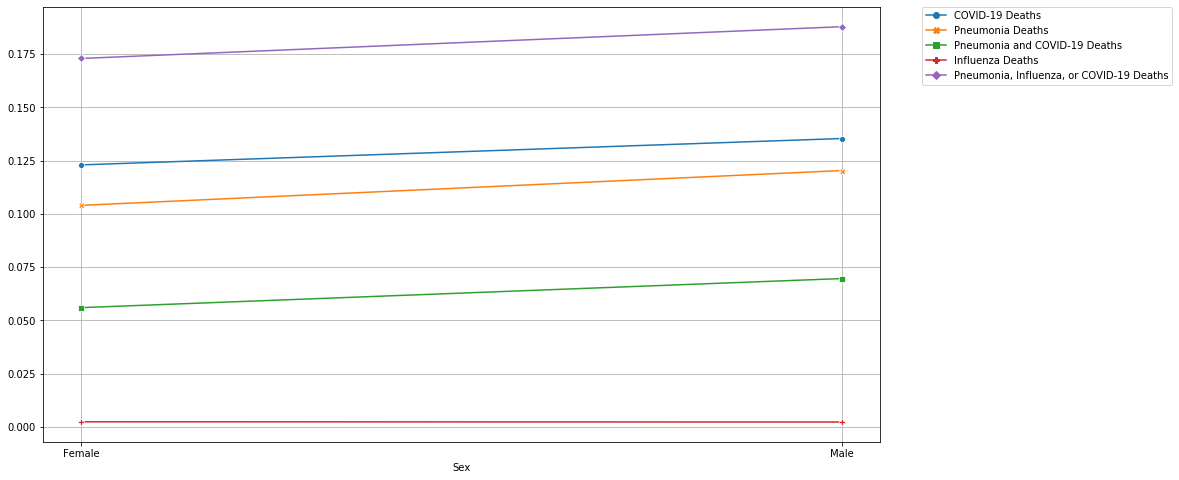

In [10]:
plt.figure(figsize= (15, 8))
sns.lineplot(data= prob_df[['COVID-19 Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths']],   markers=True, dashes=False,)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid()
plt.savefig('../figures/gender_lineplot.jpg',bbox_inches='tight')

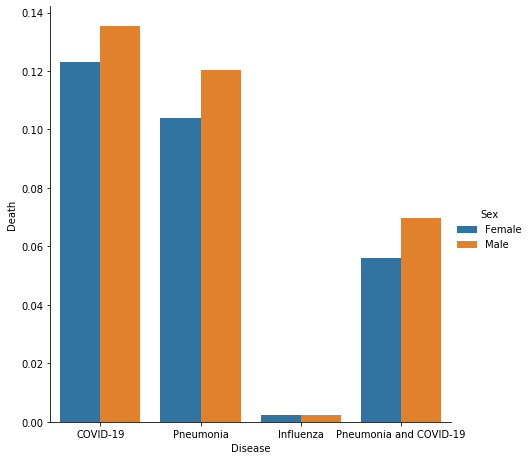

In [11]:
prob_death_df = prob_df[['COVID-19 Deaths', 'Pneumonia Deaths', 'Influenza Deaths',
       'Pneumonia and COVID-19 Deaths']].rename(lambda x: x.replace(' Deaths',''), axis= 1).reset_index()
prob_death_df = pd.melt(prob_death_df, id_vars="Sex", var_name="Disease", value_name="Death")
g = sns.catplot(x='Disease', y='Death', hue='Sex', data=prob_death_df, kind='bar', height= 6.5)

In [12]:
age_summary_df = df.groupby('Age Group').agg(np.sum)
age_prob_df = age_summary_df.apply(lambda x : x/age_summary_df['Total Deaths'])
age_prob_df.head()

,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
Age Group,,,,,,
0,0.007501,1.0,0.017235,0.001161,0.004108,0.018441
1,0.029903,1.0,0.076751,0.007227,0.046599,0.095689
5,0.029077,1.0,0.052615,0.008462,0.034923,0.069231
15,0.020071,1.0,0.021397,0.009184,0.004758,0.035788
25,0.039808,1.0,0.039110,0.018801,0.004480,0.063443


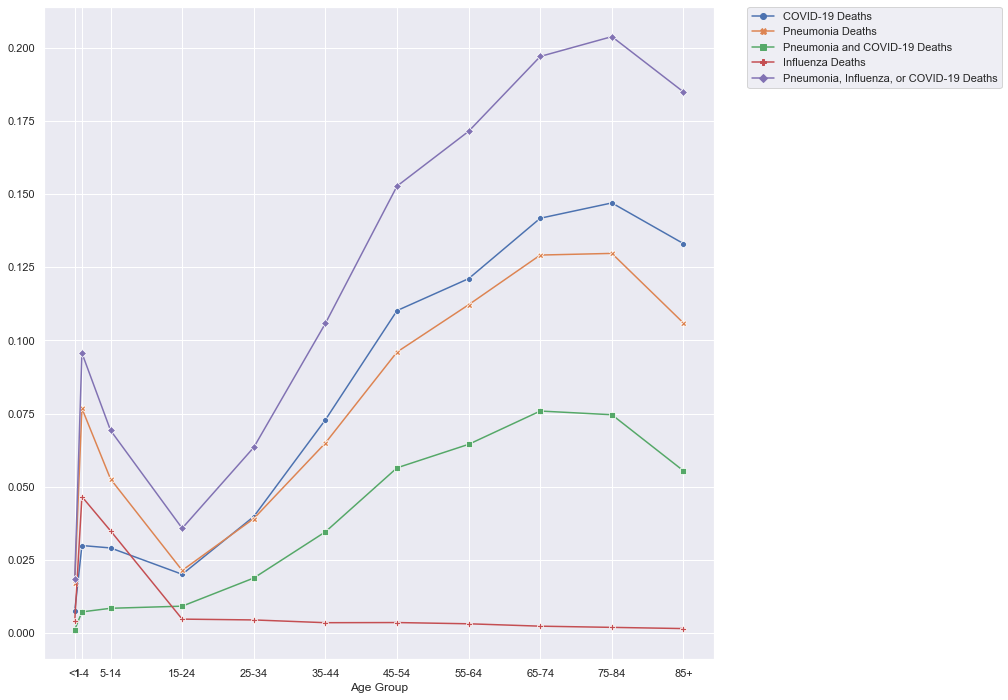

In [13]:
sns.set(rc = {'figure.figsize':(12,12)})
g = sns.lineplot(data= age_prob_df[['COVID-19 Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths']],markers=True, dashes=False)
g.set_xticks(df['Age Group'].unique())
g.set_xticklabels(["<1","1-4","5-14","15-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75-84", "85+"])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [14]:
total_summary_df = df.groupby(['Sex','Age Group']).agg(np.sum)
total_prob_df = total_summary_df.apply(lambda x : x/total_summary_df['Total Deaths'])
total_prob_df.drop('Total Deaths', axis = 1, inplace = True)
total_prob_df.head()

COVID-19 Deaths  Pneumonia Deaths  \
Sex    Age Group                                      
Female 0                 0.007277          0.016748   
       1                 0.022609          0.100870   
       5                 0.038023          0.066160   
       15                0.034004          0.031298   
       25                0.049645          0.052014   

                  Pneumonia and COVID-19 Deaths  Influenza Deaths  \
Sex    Age Group                                                    
Female 0                               0.000399          0.004785   
       1                               0.007536          0.057391   
       5                               0.003042          0.042205   
       15                              0.015694          0.009471   
       25                              0.025211          0.007730   

                  Pneumonia, Influenza, or COVID-19 Deaths  
Sex    Age Group                                            
Female 0                                          0.018941  
       1                                          0.110145  
       5                                          0.082890  
       15                                         0.054568  
       25                                         0.082896

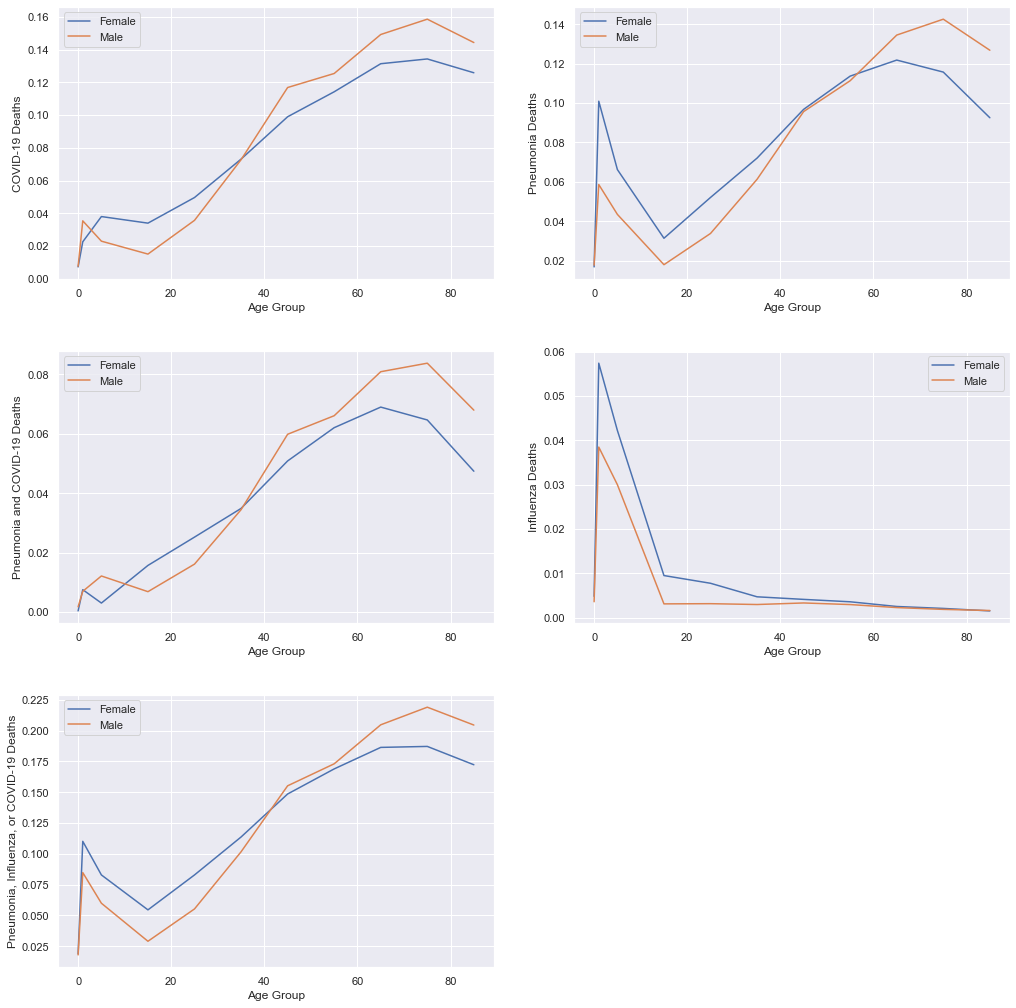

In [15]:
fig, axes = plt.subplots(3,2, figsize= (15,15))
fig.delaxes(axes[2][1])
fig.tight_layout(pad=4.0)
i = 0
j = 0
for disease in total_prob_df.columns:
    for sex in total_prob_df.index.levels[0]:
        sns.lineplot(x = total_prob_df.loc[sex].index,y = total_prob_df.loc[sex][disease], markers=True, dashes=False, label = sex, ax = axes[i][j])
    if(j == len(axes[0]) - 1):
        i+=1
        j=-1
    j+=1

In [16]:
total_prob_df.sort_values(by = 'COVID-19 Deaths', ascending= False)

COVID-19 Deaths  Pneumonia Deaths  \
Sex    Age Group                                      
Male   75                0.158530          0.142513   
       65                0.149174          0.134447   
       85                0.144266          0.126748   
Female 75                0.134252          0.115657   
       65                0.131340          0.121755   
       85                0.125817          0.092473   
Male   55                0.125373          0.111279   
       45                0.116806          0.095604   
Female 55                0.114203          0.113615   
       45                0.098953          0.096726   
       35                0.073095          0.071990   
Male   35                0.072730          0.061227   
Female 25                0.049645          0.052014   
       5                 0.038023          0.066160   
Male   25                0.035707          0.033731   
       1                 0.035402          0.058566   
Female 15                0.034004          0.031298   
Male   5                 0.022997          0.043411   
Female 1                 0.022609          0.100870   
Male   15                0.015115          0.017874   
       0                 0.007683          0.017630   
Female 0                 0.007277          0.016748   

                  Pneumonia and COVID-19 Deaths  Influenza Deaths  \
Sex    Age Group                                                    
Male   75                              0.083685          0.001837   
       65                              0.080819          0.002245   
       85                              0.067898          0.001585   
Female 75                              0.064598          0.002057   
       65                              0.068925          0.002492   
       85                              0.047365          0.001492   
Male   55                              0.066023          0.002925   
       45                              0.059786          0.003287   
Female 55                              0.062003          0.003551   
       45                              0.050816          0.004095   
       35                              0.034855          0.004676   
Male   35                              0.034436          0.002936   
Female 25                              0.025211          0.007730   
       5                               0.003042          0.042205   
Male   25                              0.016129          0.003125   
       1                               0.006993          0.038462   
Female 15                              0.015694          0.009471   
Male   5                               0.012145          0.029974   
Female 1                               0.007536          0.057391   
Male   15                              0.006867          0.003081   
       0                               0.001779          0.003558   
Female 0                               0.000399          0.004785   

                  Pneumonia, Influenza, or COVID-19 Deaths  
Sex    Age Group                                            
Male   75                                         0.218941  
       65                                         0.204651  
       85                                         0.204449  
Female 75                                         0.187121  
       65                                         0.186333  
       85                                         0.172253  
Male   55                                         0.173025  
       45                                         0.155177  
Female 55                                         0.168880  
       45                                         0.148539  
       35                                         0.113663  
Male   35                                         0.101657  
Female 25                                         0.082896  
       5                                          0.082890  
Male   25                                         0.055333  
   

In [17]:
def feature_engineering(df, monthly = False):
    if monthly:
        norm_df = df
        death_count_columns = ['COVID-19 Deaths', 'Pneumonia Deaths', 'Influenza Deaths', 'Pneumonia and COVID-19 Deaths']
        for col in norm_df.columns:
            if col in death_count_columns:
                norm_df[col] = norm_df[col]/norm_df[col].max()
    else:
        norm_df = df.apply(lambda col : col/col.max())
    norm_df =  norm_df.reset_index()
    norm_df['Cov_Pos'] = [[1,0] for _ in range(len(norm_df))]
    norm_df['Cov_Neg'] = [[0,1] for _ in range(len(norm_df))]
    norm_df = norm_df.explode(['Cov_Pos','Cov_Neg'])
    norm_df['Pne_Pos'] = [[1,0] for _ in range(len(norm_df))]
    norm_df['Pne_Neg'] = [[0, 0] for _ in range(len(norm_df))]
    norm_df = norm_df.explode(['Pne_Pos','Pne_Neg'])
    norm_df = norm_df[~( (norm_df['Cov_Pos'] == 0) & (norm_df['Pne_Pos'] == 0) )]
    norm_df = pd.get_dummies(data = norm_df, columns= ['Sex', 'Age Group'])
    norm_df['Death'] = 0
    norm_df['position'] = np.arange(norm_df.shape[0])
    norm_df.set_index('position', inplace= True)
    filter = norm_df[(norm_df['Cov_Pos'] == 1) & (norm_df['Pne_Pos'] == 0)]
    norm_df.loc[filter.index, 'Death'] = filter['COVID-19 Deaths']
    filter = norm_df[(norm_df['Cov_Pos'] == 0) & (norm_df['Pne_Pos'] == 1)]
    norm_df.loc[filter.index, 'Death'] = filter['Pneumonia Deaths']
    filter = norm_df[(norm_df['Cov_Pos'] == 1) & (norm_df['Pne_Pos'] == 1)]
    norm_df.loc[filter.index, 'Death'] = filter['Pneumonia and COVID-19 Deaths']
    norm_df.drop(['COVID-19 Deaths', 'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths',
       'Influenza Deaths', 'Pneumonia, Influenza, or COVID-19 Deaths'], axis =1, inplace = True)
    return norm_df

In [18]:
def get_input(df):
    conditions = [df ['Age'] < 1,
    (df ['Age'] >= 1) & (df ['Age'] < 5),
    (df ['Age'] >= 5) & (df ['Age'] < 15),
    (df ['Age'] >= 15) & (df ['Age'] < 25),
    (df ['Age'] >= 25) & (df ['Age'] < 35),
    (df ['Age'] >= 35) & (df ['Age'] < 45),
    (df ['Age'] >= 45) & (df ['Age'] < 55),
    (df ['Age'] >= 55) & (df ['Age'] < 65),
    (df ['Age'] >= 65) & (df ['Age'] < 75),
    (df ['Age'] >= 75) & (df ['Age'] < 85),
    (df ['Age'] >= 85)
    ]
    values = [0,1,5,15,25,35,45,55,65,75,85]
    df['Age Group'] = np.select(condlist= conditions, choicelist= values)
    return df

In [19]:
norm_df =  feature_engineering(total_prob_df)
norm_df.head()

,Cov_Pos,Cov_Neg,Pne_Pos,Pne_Neg,Sex_Female,Sex_Male,Age Group_0,Age Group_1,Age Group_5,Age Group_15,Age Group_25,Age Group_35,Age Group_45,Age Group_55,Age Group_65,Age Group_75,Age Group_85,Death
position,,,,,,,,,,,,,,,,,,
0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0.004765
1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0.045906
2,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0.117520
3,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.090054
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.142615


In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(norm_df[['Cov_Pos', 'Cov_Neg', 'Pne_Pos', 'Pne_Neg', 'Sex_Female', 'Sex_Male',
       'Age Group_0', 'Age Group_1', 'Age Group_5', 'Age Group_15',
       'Age Group_25', 'Age Group_35', 'Age Group_45', 'Age Group_55',
       'Age Group_65', 'Age Group_75', 'Age Group_85']], norm_df['Death'])


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\adity\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
input = pd.DataFrame({'Sex': ['Female', 'Male'], 'Age': [17, 70], 'Cov_Pos': [1,1], 'Pne_Pos': [0,1]})
get_input(input)

,Sex,Age,Cov_Pos,Pne_Pos,Age Group
0,Female,17,1,0,15
1,Male,70,1,1,65


Next Steps:
1) One hot encode the above input dataframe so that it matches the input of our model, then have a look at the predictions. Ideally, the second row (70 year old male) should have a higher risk output.
2) Instead of using the entire 'United States by Total Time period' granularity level which leads to a dataframe with only 1 training sample per category (Sex, Age Group), just pass the entire data on a 'monthly granularity level'. The above code should work for the new data with barely any tweaks. You can also split some of the data and keep it aside as validation dataset.

In [ ]:
# Tranforming the input df to match the training df
def transform_input(df):
    input = get_input(df)
    new_df = pd.get_dummies(data = input, columns= ['Sex', 'Age Group'])
    age_groups = [0,1,5,15,25,35,45,55,65,75,85]
    for age_group in age_groups:
        label = 'Age Group_' + str(age_group)
        if label not in new_df.columns:
            new_df[label] = 0
    new_df['Cov_Neg'] = 1 - new_df['Cov_Pos']
    new_df['Pne_Neg'] = 1 - new_df['Pne_Pos']
    new_df = new_df[['Cov_Pos', 'Cov_Neg', 'Pne_Pos', 'Pne_Neg', 'Sex_Female', 'Sex_Male',
       'Age Group_0', 'Age Group_1', 'Age Group_5', 'Age Group_15',
       'Age Group_25', 'Age Group_35', 'Age Group_45', 'Age Group_55',
       'Age Group_65', 'Age Group_75', 'Age Group_85']]
    return new_df


new_df = transform_input(input)
new_df.head()

In [ ]:
# Predicting some results
Y_hat = lm.predict(new_df)
Y_hat

In [ ]:
#Preparing data for training on monthly granularity
def normalize_death_count(df):
    temp = df.copy()
    death_count_columns = ['COVID-19 Deaths', 'Pneumonia Deaths', 'Influenza Deaths', 'Pneumonia and COVID-19 Deaths']
    for col in temp.columns:
        if col in death_count_columns:
            temp[col] = temp[col]/temp['Total Deaths']
            
    return temp

df_monthly_norm = normalize_death_count(df)
df_training_monthly_norm = feature_engineering(df_monthly_norm, monthly = True)
df_training_monthly_norm = df_training_monthly_norm.dropna()
df_training_monthly_norm.describe()

In [ ]:
#Training on monthly granularity
lmm = LinearRegression()
lmm.fit(df_training_monthly_norm[['Cov_Pos', 'Cov_Neg', 'Pne_Pos', 'Pne_Neg', 'Sex_Female', 'Sex_Male',
       'Age Group_0', 'Age Group_1', 'Age Group_5', 'Age Group_15',
       'Age Group_25', 'Age Group_35', 'Age Group_45', 'Age Group_55',
       'Age Group_65', 'Age Group_75', 'Age Group_85']], df_training_monthly_norm['Death'])

In [ ]:
#Predicting some results with new model
Y_hat_2 = lmm.predict(new_df)
Y_hat_2